In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/IDM/A3/Data.csv')


In [3]:
from sklearn.cluster import KMeans
from sklearn import datasets


In [85]:
#data = datasets.load_iris()
#X = data.data
X=data
X=X.drop(columns=['row ID'])
df = pd.DataFrame(X)

df.shape



(2783, 132)

In [90]:
X.shape

(2783, 87)

# **VARIANCE**

In [89]:
var = X.agg("var", numeric_only=True)
X = X.drop(columns=var[var.between(0, 0.0001)].index)


# **CO-Relation**

In [80]:
import numpy as np

#np.cov(X)

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X.drop(to_drop, axis=1, inplace=True)

df.shape
#for i in df.columns:
#  print(df.cov(i))


<ipython-input-80-2ad2e7bf387a>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


(2783, 132)

In [52]:
from sklearn.decomposition import PCA
pca = PCA(70)
X = pca.fit_transform(X)
X.shape


(2783, 70)

# **KMEANS**

In [29]:
a=22

In [56]:
km = KMeans(n_clusters =a)
km.fit(X)
predict= km.fit_predict(X)
new_labels = pd.DataFrame(km.labels_)
#print(new_labels)

In [57]:
out= pd.read_csv('/content/drive/MyDrive/IDM/A3/sample.csv')
out['cluster']= predict
out.to_csv('/content/drive/MyDrive/IDM/A3/KM c=22 var 0.0001 pca col=70 new.csv', index=False)


In [ ]:
predict

array([ 0,  0,  0, ...,  4, 19, 17], dtype=int32)

In [ ]:
km.inertia_

962.961103950254

In [ ]:
#km.cluster_centers_
km.n_iter_

8

# **ELBOW**

[14136.896381382066, 12396.3776072412, 11197.143674507246, 10379.603581267223, 9485.656336088106, 8838.858539944908, 8069.018319559278, 7212.854407713552, 6682.914600551054, 6003.951652892594, 5667.138429752091, 4958.190082644621, 4599.930991735562, 4129.683195592301, 3532.3298898071616, 3069.7493112947604, 2574.305785123958, 2224.9380165289176, 1776.7892561983413, 1421.719008264455, 1078.0743801652857, 968.3305785123907, 957.3246262977142, 951.4466322071959, 935.9310097785698, 934.4178515033913, 923.3010380850939, 912.7238828269182, 892.1620398786234, 885.8062786950254, 880.318862008925, 874.1154316753655, 868.3245468029298, 856.5592534993428, 846.7544950552706, 835.6359649007821, 824.5169026380277, 818.8955102066762, 803.1981556517717, 791.7268422302838, 790.8614056721137, 784.7611429732088, 774.8069826652028, 774.6224048388627, 763.2018190889652, 747.3406969130425, 742.4537527166642, 735.5289894378666]


Text(0.5, 1.0, 'Elbow curve')

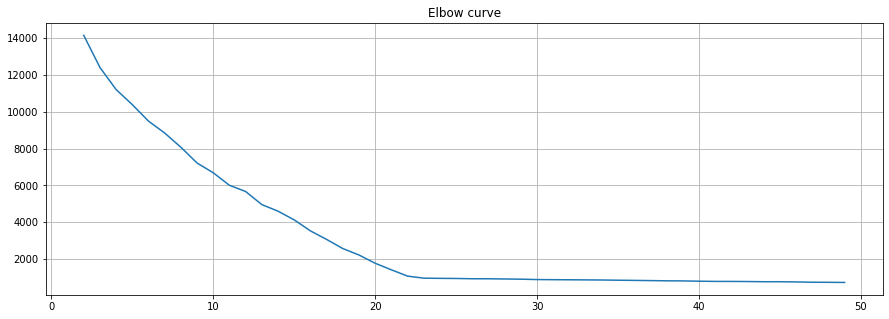

In [81]:
from matplotlib import pyplot as plt

sse = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
print(sse)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), sse)
plt.grid(True)
plt.title('Elbow curve')

In [67]:
!pip install --upgrade kneed



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from kneed import KneeLocator

kl = KneeLocator(range(2, 50), sse, curve="convex", direction="decreasing")
kl.elbow

22

# **DENDOGRAM**

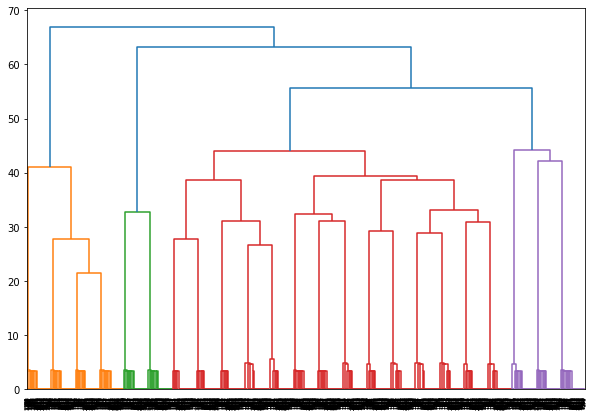

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


linked = linkage(X, 'ward')

labelList = range(1, 50)

plt.figure(figsize=(10, 7))
dendrogram(linked) ,
#            orientation='top',
#            labels=labelList,
#            distance_sort='descending',
#            show_leaf_counts=True)
plt.show()

## **SILHOUETTE**

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score
label=3
kmeans = KMeans(n_clusters=label)
kmeans.fit(X)
    
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("For n_clusters =", label , "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
#sample_silhouette_values = silhouette_samples(X, new_labels2)

For n_clusters = 3 The average silhouette_score is : 0.21391993581977822


In [82]:
s_avg = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sil_sc = silhouette_score(X, kmeans.labels_)
    #print(k)
    s_avg.append(sil_sc)
print(s_avg)



[0.17386854982516037, 0.21168827931443493, 0.21427149333943135, 0.2405198175431272, 0.27564348723810894, 0.28823711956332393, 0.33700612988244216, 0.3717928243036098, 0.3856991417757379, 0.40684318762222066, 0.4535025790810394, 0.47221691865358956, 0.5137357240869863, 0.5418109376931173, 0.5774431550740484, 0.6070665755667395, 0.6389191091818215, 0.6704470288115164, 0.6973273321333702, 0.7257290079604428, 0.7487361983012905, 0.7523009934934568, 0.7442552481303295, 0.7450250270709067, 0.7287207737613061, 0.7191663351743881, 0.7200186489066859, 0.7318771840209295, 0.7231042057254583, 0.7118367226153269, 0.7041449457277692, 0.6978105985183948, 0.691138535590086, 0.7026145494910642, 0.6803683711673052, 0.7135123840212994, 0.7032097963244889, 0.7005813904129294, 0.6919855925643354, 0.7002335370106373, 0.6882351965749824, 0.6694977848234651, 0.7075380425391071, 0.6997534886408492, 0.6813454811918889, 0.689022373529189, 0.6737551231985045, 0.6910691831997856]


Text(0.5, 1.0, 'Sil curve')

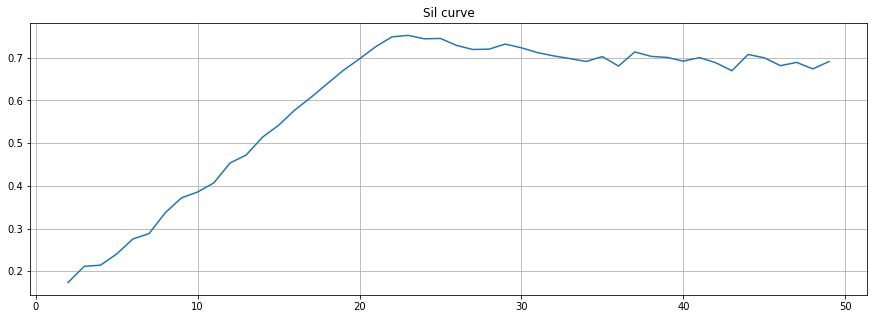

In [83]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), s_avg)
plt.grid(True)
plt.title('Sil curve')

# **AGGLOMERATIVE ALGO**

In [60]:
from sklearn.cluster import AgglomerativeClustering
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# ward, complete, average, single

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single')
#new_labels2 = pd.DataFrame(cluster.fit_predict(X))
#cluster.fit(X)
predict= cluster.fit_predict(X)




In [61]:
out= pd.read_csv('/content/drive/MyDrive/IDM/A3/sample.csv')
out['cluster']= predict
out.to_csv('/content/drive/MyDrive/IDM/A3/AC c=8 a=euc lin=single var 0.0001 pca col=70 new.csv', index=False)

In [ ]:
X.shape

(2783, 87)

# **SIL AGGLOMErative**

In [ ]:
# from matplotlib import pyplot as plt

# sse = []
# for k in range(2, 50):
#     cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')    
#     #kmeans.fit(X)
#     cluster.fit(X)
#     sse.append(cluster.labels_)
# print(sse)
# fig = plt.figure(figsize=(15, 5))
# plt.plot(range(2, 50), sse)
# plt.grid(True)
# plt.title('Elbow curve')

AttributeError: ignored

[0.16155107761867543, 0.20938649569835066, 0.24122989130464906, 0.27252393707803896, 0.2577953211694662, 0.29502713404781006, 0.3287800809514105, 0.3595817006342587, 0.39541485470456483, 0.43683068983837, 0.4647479505053515, 0.4905755293456399, 0.5183554491925262, 0.5474128329320739, 0.5801168056002425, 0.6128057710813171, 0.6365447957182726, 0.6643072933868693, 0.6884181501620941, 0.7183561578123989, 0.7467552924020544, 0.7642846894705438, 0.7608477088721789, 0.7519381700595581, 0.745935308175451, 0.7387225416059403, 0.7309868248978154, 0.724062309363287, 0.7175972778426153, 0.7067739344145565, 0.7011476672426395, 0.6964384510340078, 0.7017038962413541, 0.7074560787988426, 0.713208261356331, 0.7186765448341912, 0.7240560173570746, 0.7297782562087298, 0.7353161447210448, 0.7414798383978278, 0.747643532074611, 0.738676578815652, 0.7247826271277553, 0.7122323628086252, 0.7009169280188677, 0.6891860177380643, 0.6817034032071714, 0.67030418042697]


Text(0.5, 1.0, 'Sil curve')

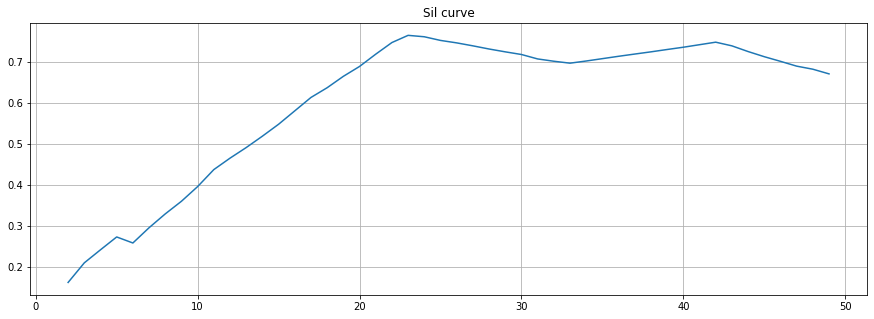

In [98]:
from sklearn.metrics import silhouette_samples, silhouette_score

s_avg = []
for k in range(2, 50):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    cluster.fit(X)
    sil_sc = silhouette_score(X, cluster.labels_)
    #print(k)
    s_avg.append(sil_sc)
print(s_avg)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), s_avg)
plt.grid(True)
plt.title('Sil curve')

Text(0.5, 1.0, 'Sil curve')

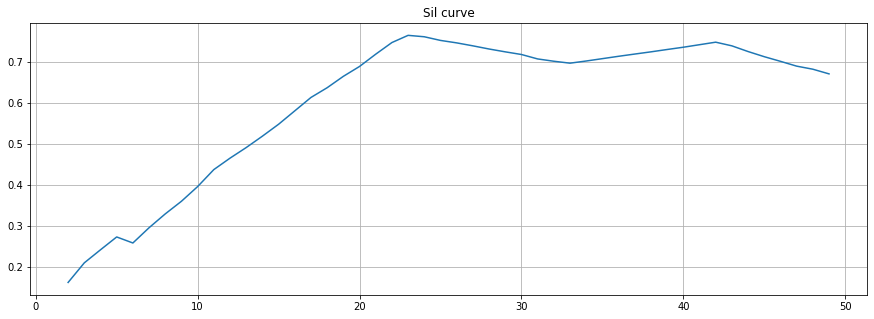

# **Gaussian**

In [ ]:
#https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture


# define the model
gaussian_model = GaussianMixture(n_components=14)

# train the model
gaussian_model.fit(X)

# assign each data point to a cluster
predict = gaussian_model.predict(X)

out= pd.read_csv('/content/drive/MyDrive/IDM/A3/sample.csv')
out['cluster']= predict
out.to_csv('/content/drive/MyDrive/IDM/A3/Gaussian c=14 col=132.csv', index=False)
